In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#% matplotlib inline
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

data = pd.read_csv(r'C:\Users\DELL\Documents\diabetes.csv')    #importing the dataset
data.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
data.tail(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [3]:
data.shape


(768, 9)

In [4]:
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
data.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0.5, 0, 'Glucose')

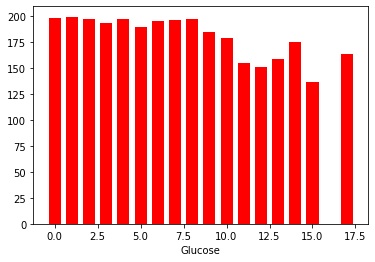

In [7]:
X = data.iloc[:,0:8]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
X_train.shape
X_test.shape
plt.title("")
plt.bar(data['Pregnancies'],data['Glucose'],color='red',width=0.7,align='center')
plt.xlabel("Pregnancies")
plt.xlabel("Glucose")


In [8]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


[Text(561.707974137931, 1055.2235294117647, 'X[1] <= 129.5\ngini = 0.449\nsamples = 537\nvalue = [354, 183]'),
 Text(207.9471982758621, 991.2705882352941, 'X[5] <= 26.3\ngini = 0.329\nsamples = 357\nvalue = [283, 74]'),
 Text(64.13793103448276, 927.3176470588236, 'X[5] <= 9.1\ngini = 0.06\nsamples = 97\nvalue = [94, 3]'),
 Text(32.06896551724138, 863.364705882353, 'X[1] <= 114.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(16.03448275862069, 799.4117647058824, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(48.10344827586207, 799.4117647058824, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(96.20689655172414, 863.364705882353, 'X[6] <= 0.669\ngini = 0.022\nsamples = 91\nvalue = [90, 1]'),
 Text(80.17241379310346, 799.4117647058824, 'gini = 0.0\nsamples = 76\nvalue = [76, 0]'),
 Text(112.24137931034483, 799.4117647058824, 'X[6] <= 0.705\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(96.20689655172414, 735.4588235294118, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Tex

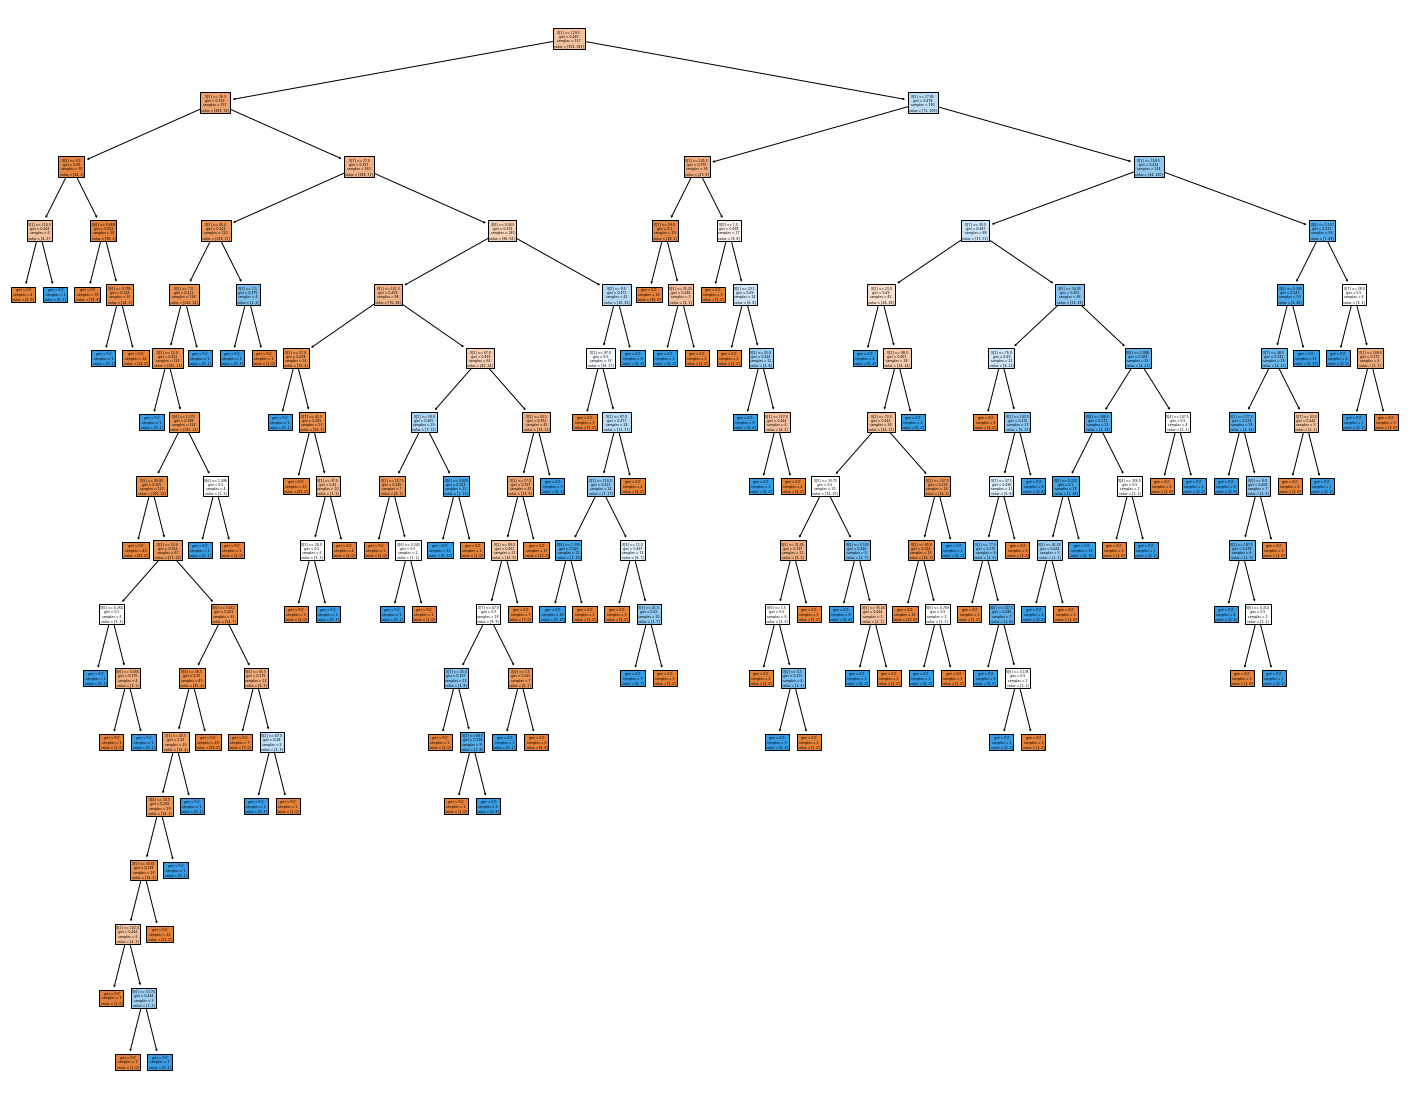

In [9]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
plt.figure(figsize=(25,20))
tree.plot_tree(clf,filled=True)


In [10]:
#feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
#by Attribute selection measure 
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [11]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
y_pred= clf.predict(X_test)  
print(y_pred)
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

Accuracy: 0.7705627705627706
[0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0
 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0
 0 1 0 1 0 0 0 1 0]


array([[124,  22],
       [ 31,  54]], dtype=int64)